In [1]:
import os
import sys

nb_dir_1 = os.path.split(os.getcwd())[0]
current_path = os.getcwd()
parent = os.path.dirname(current_path)
nb_dir_2 = os.path.split(parent)[0]

if nb_dir_1 not in sys.path:
    sys.path.append(nb_dir_1)

if nb_dir_2 not in sys.path:
    sys.path.append(nb_dir_2)

In [2]:
import numpy as np
import pandas as pd
import torch
from core.models import LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import scipy.stats
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from core.data_preparation import DataPreparation
from core.curve_fit import fit_polynomial_curve_to_data_and_visualize

In [3]:
airtel = pd.read_csv('../Airtel/Airtel_results.csv')
airtel.head()

,Test set range,RMSE,R2-score,MAPE,Anderson_Darling_dist,CVM_dist,DTS_dist,Kolmogorov_Smirnov_dist,Kuiper_dist,Wasserstein_dist
0,0 : 70,13.631281,0.882810,2.395231,34.082806,665.224522,4.803516,0.674516,0.686569,77.611186
1,70 : 140,20.591997,0.712642,3.208272,47.261884,839.845042,12.059799,0.912409,0.912409,151.299296
2,140 : 210,15.584275,-0.107580,1.909661,52.314084,883.842786,18.676185,0.994597,0.994597,214.430011
3,210 : 280,13.764590,0.890884,2.233878,43.432492,803.685881,8.795763,0.862843,0.862843,120.512155
4,280 : 350,17.051566,0.840156,2.356871,50.280118,866.052345,17.682769,0.971737,0.971737,195.066435


In [4]:
airtel = pd.read_csv('../Airtel/Airtel_results.csv')
airtel.head()

,Test set range,RMSE,R2-score,MAPE,Anderson_Darling_dist,CVM_dist,DTS_dist,Kolmogorov_Smirnov_dist,Kuiper_dist,Wasserstein_dist
0,0 : 70,13.631281,0.882810,2.395231,34.082806,665.224522,4.803516,0.674516,0.686569,77.611186
1,70 : 140,20.591997,0.712642,3.208272,47.261884,839.845042,12.059799,0.912409,0.912409,151.299296
2,140 : 210,15.584275,-0.107580,1.909661,52.314084,883.842786,18.676185,0.994597,0.994597,214.430011
3,210 : 280,13.764590,0.890884,2.233878,43.432492,803.685881,8.795763,0.862843,0.862843,120.512155
4,280 : 350,17.051566,0.840156,2.356871,50.280118,866.052345,17.682769,0.971737,0.971737,195.066435


In [5]:
google = pd.read_csv('../Google/Google_results.csv')
google.head()

,Test set range,RMSE,R2-score,MAPE,Anderson_Darling_dist,CVM_dist,DTS_dist,Kolmogorov_Smirnov_dist,Kuiper_dist,Wasserstein_dist
0,0 : 70,24.847720,0.525557,1.957763,67.723143,1591.851744,29.832231,0.934012,0.951163,634.729748
1,70 : 140,31.121782,0.604659,2.168661,76.593174,1680.537542,40.164365,0.951744,0.951744,740.495994
2,140 : 210,26.349113,0.710956,1.649139,74.798111,1665.192400,37.472465,0.954651,0.955233,717.432218
3,210 : 280,36.731731,0.462875,2.524405,81.572971,1719.852782,52.687918,0.989535,0.989535,842.073545
4,280 : 350,82.026500,0.682507,5.179344,80.198139,1704.839078,65.444138,0.959012,0.959012,910.238956


In [6]:
jpm = pd.read_csv('../JPMorgan/JPM_results.csv')
jpm.head()

,Test set range,RMSE,R2-score,MAPE,Anderson_Darling_dist,CVM_dist,DTS_dist,Kolmogorov_Smirnov_dist,Kuiper_dist,Wasserstein_dist
0,0 : 70,2.229901,0.691021,1.676739,61.881121,1358.646025,3.577929,0.977095,0.977616,61.249937
1,70 : 140,2.319982,0.622912,1.594654,62.571303,1365.051588,3.705661,0.977095,0.977095,62.626808
2,140 : 210,2.529879,0.565769,1.808654,57.083706,1316.494534,2.836339,0.958095,0.969027,53.439072
3,210 : 280,2.414821,0.696701,1.767149,60.493951,1347.845207,3.384273,0.973451,0.975794,59.375917
4,280 : 350,2.429072,0.644384,1.644052,63.345856,1368.830103,3.815738,0.978397,0.978397,63.118487


In [7]:
mrf = pd.read_csv('../MRF/MRF_results.csv')
mrf.head()

,RMSE,R2-score,MAPE,Anderson_Darling_dist,CVM_dist,DTS_dist,Kolmogorov_Smirnov_dist,Kuiper_dist,Wasserstein_dist
0,1641.199561,0.395728,2.052163,58.606892,1445.392897,2012.183818,0.897656,0.955206,46034.546281
1,2082.176505,0.653722,2.914858,55.110294,1383.627186,1684.597181,0.891724,0.965292,39839.511448
2,1108.643766,0.147282,1.524264,54.991881,1380.826529,1579.039456,0.885197,0.991694,37749.082138
3,1711.482837,0.653997,2.123453,56.045833,1400.374281,1824.683990,0.891724,0.968852,42509.861935
4,1403.890176,0.807993,1.712163,60.305894,1471.034737,2086.776285,0.898250,0.929101,47227.481492


In [8]:
reliance = pd.read_csv('../Reliance/Reliance_results.csv')
reliance.head()

,Test set range,RMSE,MAPE,R2-score,Anderson_Darling_dist,CVM_dist,DTS_dist,Kolmogorov_Smirnov_dist,Kuiper_dist,Wasserstein_dist
0,0 : 50,21.862274,1.466220,0.844715,44.599001,896.710674,17.721299,0.870898,0.908895,305.233034
1,50 : 100,32.832170,1.872950,0.785726,45.295833,903.125579,18.685398,0.892919,0.912781,315.430004
2,100 : 150,29.439392,1.586831,0.658086,57.083393,1027.650915,41.374411,0.978843,0.983592,551.675208
3,150 : 200,43.397971,2.353779,0.921883,50.479374,938.598826,30.527129,0.789620,0.798687,428.530418
4,200 : 250,55.269042,3.517238,0.917531,44.727345,845.719689,24.344893,0.703109,0.712176,347.964178


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
degree = 2

In [151]:
xa = np.array(airtel['Wasserstein_dist'].values)
# ya = np.array(airtel['RMSE'].values)
# ya = np.array(airtel['MAPE'].values)
ya = np.array(airtel['R2-score'].values)

# when normalized use these lines, else comment this part of the code
xa = scaler.fit_transform(xa.reshape(-1, 1))
ya = scaler.fit_transform(ya.reshape(-1, 1))

xa = xa.flatten()
ya = ya.flatten()

#end

za = np.polyfit(xa, ya, degree)

fit_airtel = np.poly1d(za)

xa_min = xa.min()
xa_max = xa.max()

xpa = np.linspace(xa_min, xa_max, 100)
ypa = fit_airtel(xpa)

In [154]:
xg = np.array(google['Wasserstein_dist'].values)
# yg = np.array(google['RMSE'].values)
# yg = np.array(google['MAPE'].values)
yg = np.array(google['R2-score'].values)

# when normalized use these lines, else comment this part of the code
xg = scaler.fit_transform(xg.reshape(-1, 1))
yg = scaler.fit_transform(yg.reshape(-1, 1))

xg = xg.flatten()
yg = yg.flatten()

#end

zg = np.polyfit(xg, yg, degree)

fit_google = np.poly1d(zg)

xg_min = xg.min()
xg_max = xg.max()

xpg = np.linspace(xg_min, xg_max, 100)
ypg = fit_google(xpg)

In [155]:
xj = np.array(jpm['Wasserstein_dist'].values)
# yj = np.array(jpm['RMSE'].values)
# yj = np.array(jpm['MAPE'].values)
yj = np.array(jpm['R2-score'].values)

# when normalized use these lines, else comment this part of the code
xj = scaler.fit_transform(xj.reshape(-1, 1))
yj = scaler.fit_transform(yj.reshape(-1, 1))

xj = xj.flatten()
yj = yj.flatten()

#end

zj = np.polyfit(xj, yj, degree)

fit_jpm = np.poly1d(zj)

xj_min = xj.min()
xj_max = xj.max()

xpj = np.linspace(xj_min, xj_max, 100)
ypj = fit_jpm(xpj)

In [156]:
xm = np.array(mrf['Wasserstein_dist'].values)
# ym = np.array(mrf['RMSE'].values)
# ym = np.array(mrf['MAPE'].values)
ym = np.array(mrf['R2-score'].values)

# when normalized use these lines, else comment this part of the code
xm = scaler.fit_transform(xm.reshape(-1, 1))
ym = scaler.fit_transform(ym.reshape(-1, 1))

xm = xm.flatten()
ym = ym.flatten()

#end

zm = np.polyfit(xm, ym, degree)

fit_mrf = np.poly1d(zm)

xm_min = xm.min()
xm_max = xm.max()

xpm = np.linspace(xm_min, xm_max, 100)
ypm = fit_mrf(xpm)

In [157]:
xr = np.array(reliance['Wasserstein_dist'].values)
# yr = np.array(reliance['RMSE'].values)
# yr = np.array(reliance['MAPE'].values)
yr = np.array(reliance['R2-score'].values)

# when normalized use these lines, else comment this part of the code
xr = scaler.fit_transform(xr.reshape(-1, 1))
yr = scaler.fit_transform(yr.reshape(-1, 1))

xr = xr.flatten()
yr = yr.flatten()

#end

zr = np.polyfit(xr, yr, degree)

fit_reliance = np.poly1d(zr)

xr_min = xr.min()
xr_max = xr.max()

xpr = np.linspace(xr_min, xr_max, 100)
ypr = fit_reliance(xpr)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


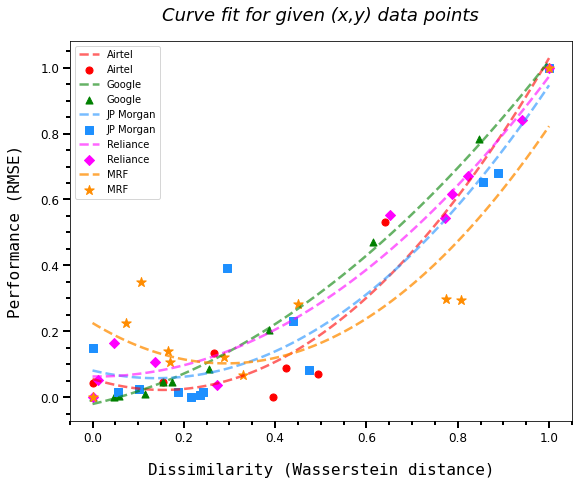

In [120]:
#Plotting RMSE-WD
fig1 = plt.figure(figsize=(9,7))
ax1 = fig1.subplots()
ax1.plot(xpa, ypa, 'r', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'Airtel')
ax1.scatter(xa, ya, 50, 'r', "o", label = 'Airtel')
ax1.plot(xpg, ypg, 'g', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'Google')
ax1.scatter(xg, yg, 50, 'g', "^", label = 'Google')
ax1.plot(xpj, ypj, 'dodgerblue', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'JP Morgan')
ax1.scatter(xj, yj, 50, 'dodgerblue', "s", label = 'JP Morgan')
ax1.plot(xpr, ypr, 'magenta', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'Reliance')
ax1.scatter(xr, yr, 50, 'magenta', "D", label = 'Reliance')
ax1.plot(xpm, ypm, 'darkorange', linestyle='dashed', linewidth=2.5, alpha = 0.75, label = 'MRF')
ax1.scatter(xm, ym, 100, 'darkorange', "*", label = 'MRF')
ax1.set_xlabel('Dissimilarity (Wasserstein distance)', fontsize=16, family='monospace')
plt.xticks(fontsize=12)
ax1.tick_params(which='both', width=2, length=7)
ax1.tick_params(which='minor', length=4)
ax1.xaxis.labelpad = 18
ax1.set_ylabel('Performance (RMSE)', fontsize=16, family='monospace')
plt.yticks(fontsize=12)
ax1.yaxis.labelpad = 18
ax1.set_title('Curve fit for given (x,y) data points', fontsize=18, style='italic', pad=20)
plt.minorticks_on()
ax1.legend(loc='best')


plt.savefig('RMSE_vs._WassersteinDist.eps', dpi=1200)
plt.savefig('RMSE_vs._WassersteinDist.jpg', dpi=1200)
plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


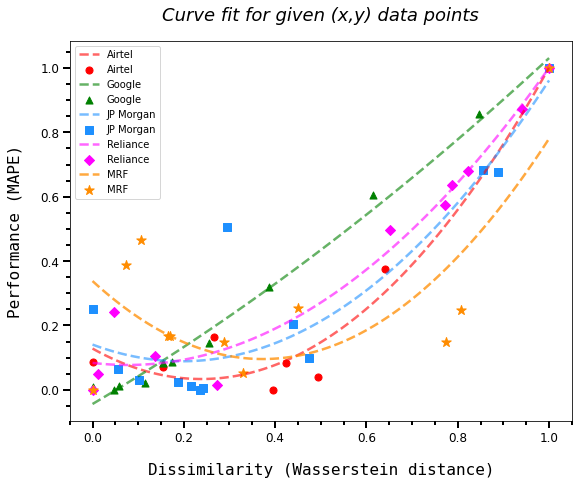

In [147]:
#Plotting MAPE-WD
fig1 = plt.figure(figsize=(9,7))
ax1 = fig1.subplots()
ax1.plot(xpa, ypa, 'r', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'Airtel')
ax1.scatter(xa, ya, 50, 'r', "o", label = 'Airtel')
ax1.plot(xpg, ypg, 'g', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'Google')
ax1.scatter(xg, yg, 50, 'g', "^", label = 'Google')
ax1.plot(xpj, ypj, 'dodgerblue', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'JP Morgan')
ax1.scatter(xj, yj, 50, 'dodgerblue', "s", label = 'JP Morgan')
ax1.plot(xpr, ypr, 'magenta', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'Reliance')
ax1.scatter(xr, yr, 50, 'magenta', "D", label = 'Reliance')
ax1.plot(xpm, ypm, 'darkorange', linestyle='dashed', linewidth=2.5, alpha = 0.75, label = 'MRF')
ax1.scatter(xm, ym, 100, 'darkorange', "*", label = 'MRF')
ax1.set_xlabel('Dissimilarity (Wasserstein distance)', fontsize=16, family='monospace')
plt.xticks(fontsize=12)
ax1.tick_params(which='both', width=2, length=7)
ax1.tick_params(which='minor', length=4)
ax1.xaxis.labelpad = 18
ax1.set_ylabel('Performance (MAPE)', fontsize=16, family='monospace')
plt.yticks(fontsize=12)
ax1.yaxis.labelpad = 18
ax1.set_title('Curve fit for given (x,y) data points', fontsize=18, style='italic', pad=20)
plt.minorticks_on()
ax1.legend(loc='best')


plt.savefig('MAPE_vs._WassersteinDist.eps', dpi=1200)
plt.savefig('MAPE_vs._WassersteinDist.jpg', dpi=1200)
plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


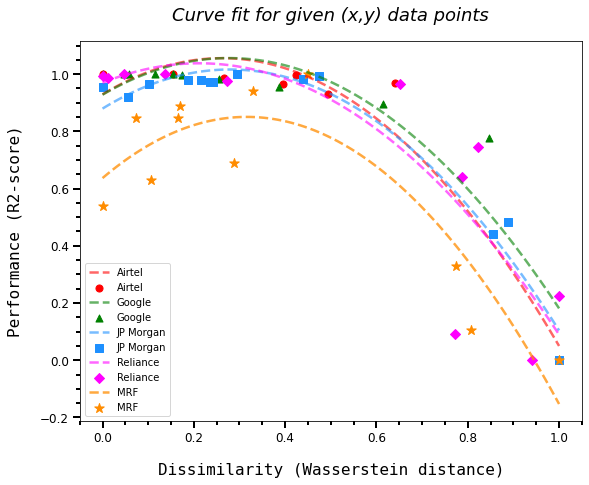

In [159]:
#Plotting R2score-WD
fig1 = plt.figure(figsize=(9,7))
ax1 = fig1.subplots()
ax1.plot(xpa, ypa, 'r', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'Airtel')
ax1.scatter(xa, ya, 50, 'r', "o", label = 'Airtel')
ax1.plot(xpg, ypg, 'g', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'Google')
ax1.scatter(xg, yg, 50, 'g', "^", label = 'Google')
ax1.plot(xpj, ypj, 'dodgerblue', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'JP Morgan')
ax1.scatter(xj, yj, 50, 'dodgerblue', "s", label = 'JP Morgan')
ax1.plot(xpr, ypr, 'magenta', linestyle='dashed', linewidth=2.5, alpha = 0.6, label = 'Reliance')
ax1.scatter(xr, yr, 50, 'magenta', "D", label = 'Reliance')
ax1.plot(xpm, ypm, 'darkorange', linestyle='dashed', linewidth=2.5, alpha = 0.75, label = 'MRF')
ax1.scatter(xm, ym, 100, 'darkorange', "*", label = 'MRF')
ax1.set_xlabel('Dissimilarity (Wasserstein distance)', fontsize=16, family='monospace')
plt.xticks(fontsize=12)
ax1.tick_params(which='both', width=2, length=7)
ax1.tick_params(which='minor', length=4)
ax1.xaxis.labelpad = 18
ax1.set_ylabel('Performance (R2-score)', fontsize=16, family='monospace')
plt.yticks(fontsize=12)
ax1.yaxis.labelpad = 18
ax1.set_title('Curve fit for given (x,y) data points', fontsize=18, style='italic', pad=20)
plt.minorticks_on()
ax1.legend(loc='lower left')


plt.savefig('R2_vs._WassersteinDist.eps', dpi=1200)
plt.savefig('R2_vs._WassersteinDist.jpg', dpi=1200)
plt.show()

